---
title: Logistic regression - house pricing
jupyter: python3
---


## What is logistic regression?
Logistic regression is a tool that can be used for solving *classification problems*, in particular, predicting the probability of a binary outcome. For example:

- Predicting whether “it will rain or not” (yes/no)  
- Predicting whether “a house is worth buying” (worth/not worth)  

## When is logistic regression Suitable?
Logistic regression is useful when you need to make a “two-choice” decision (though it can also be extended to more categories).  
It’s suitable in scenarios like:

1. **Classification problems**: Like predicting “will a student pass or fail?” or “does a patient have a disease?”  
2. **Quantifiable features**: When you have numerical inputs (like house size, income) to base your prediction on.  
3. **Need probabilities**: When you want not just a “yes or no” answer, but also “how likely is it?”  

Some real-life examples are: 

- Predicting “should I bring an umbrella today?”: Using temperature, humidity, and wind speed, logistic regression might tell you “70% chance of rain”.  
- Predicting “is this house worth buying?”: Using size, location, and price, it might say “80% worth buying”.

In this notebook, we’ll use the California Housing dataset to try predicting whether a house in a certain area has a “high” or “low” price using logistic regression!


## Pre-requisites

Before we dive into building our logistic regression model, we need to gather some tools—like setting up our workbench before starting a project! These tools (called "libraries" in programming) help us load data, do math, draw pictures, and build the model. Each library has a special job, and together they make our work easier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Step 1: Loading and Exploring the California Housing Dataset

### What Are We Doing Here?
We’re starting by loading the California Housing dataset, which tells us about small areas in California (not individual houses, but regions called "block groups"). We’ll peek at the data, set up our prediction task (high-priced or low-priced areas), and draw a picture to see how income relates to house prices.

### Why This Step?
We need to understand our data before predicting anything—it’s like checking your ingredients before cooking! Here, we’ll turn house prices into a “yes or no” question: is this area high-priced?

head of housing dataset：
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


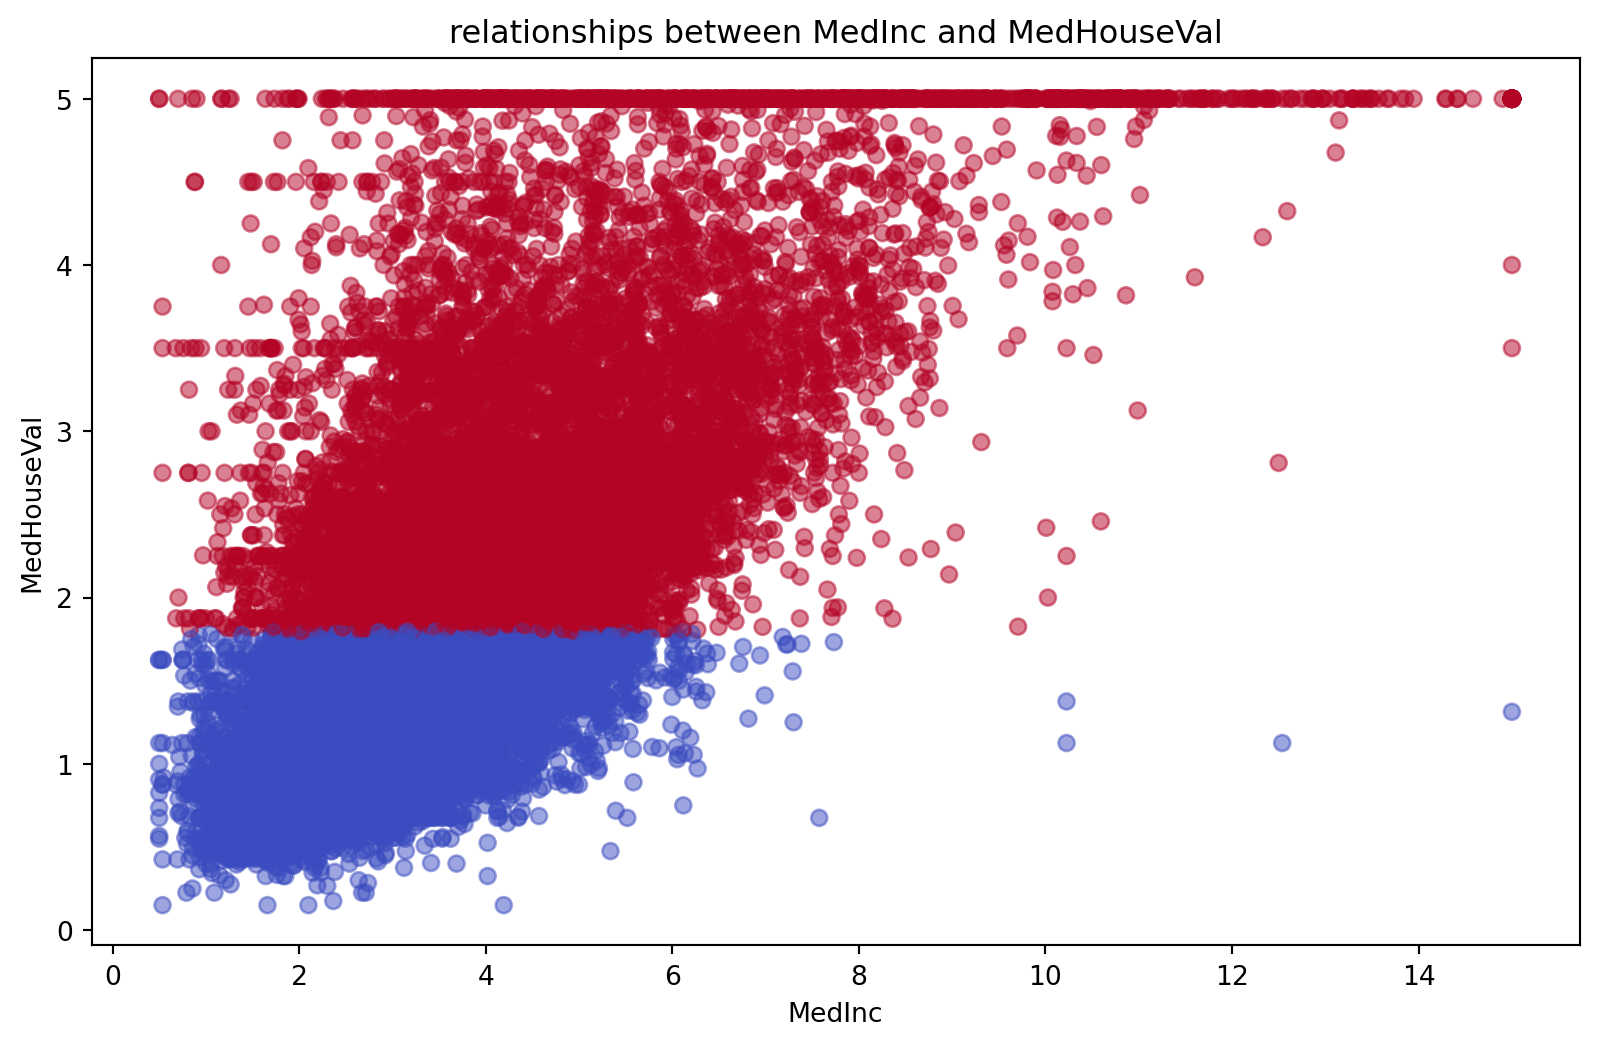

red is High price house，blue is Low price house，we need to predict whether a house is high price or low price


In [2]:
# load california housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target  # old target is the MedHouseVal

# Let us look at the head of the data
print("head of housing dataset：")
print(data.head())

# here we set a new target 'HIGH_PRICE' that is whether the price is higher than the median of all block groups' MedHouseVal, if higher, 1, otherwise, 0
median_price = data['MedHouseVal'].median()
data['HIGH_PRICE'] = np.where(data['MedHouseVal'] > median_price, 1, 0)

# plt to see the relationship between MedInc and MedHouseVal
plt.figure(figsize=(10, 6))
plt.scatter(data['MedInc'], data['MedHouseVal'], c=data['HIGH_PRICE'], cmap='coolwarm', alpha=0.5)
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('relationships between MedInc and MedHouseVal')
plt.show()

print("red is High price house，blue is Low price house，we need to predict whether a house is high price or low price")

## Step 2: A First Look at logistic regression with a Simple Example

### What Are We Doing Here?
Before using all the data, let’s try logistic regression with a tiny example. We’ll use just one piece of info—income—to predict if an area has high-priced houses. It’s a quick way to see how the model learns and makes guesses.

### Why This Step?
Starting small helps us understand how logistic regression works—like practicing with a toy car before driving a real one! We’ll see how it predicts “yes” or “no” based on income.

In [3]:
print("Logistic regression is a tool that help us predict true or false")
print("eg: we want to predict whether a house is high price or low price according to the income")

# simple data：MedInc and HIGH_PRICE
simple_data = pd.DataFrame({
    'MedInc': [2, 4, 6, 8],
    'HIGH_PRICE': [0, 0, 1, 1]
})

# train a simple model
simple_model = LogisticRegression()
simple_model.fit(simple_data[['MedInc']], simple_data['HIGH_PRICE'])

#predict
predictions = simple_model.predict([[3], [7]])
print(f"prediction of 3：{predictions[0]}（0=low-price，1=high-price）")
print(f"prediction of 7：{predictions[1]}")
print("The model learned that the higher the income, the more likely housing prices will be!")

Logistic regression is a tool that help us predict true or false
eg: we want to predict whether a house is high price or low price according to the income
prediction of 3：0（0=low-price，1=high-price）
prediction of 7：1
The model learned that the higher the income, the more likely housing prices will be!


/home/runner/work/data-analysis-python-2/data-analysis-python-2/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Step 3: Preparing Data and Training the logistic regression Model

### What Are We Doing Here?
Now we’ll get our data ready and teach our logistic regression model to make predictions. We’ll pick a few key features (like income and number of rooms), clean things up, and split the data into practice and test sets—like preparing flashcards for studying and saving some for a quiz.

### Why This Step?
Data needs a bit of prep to work well with our model, just like washing veggies before cooking. Then we’ll train the model to spot patterns, like “high-income areas often have pricier houses,” and test it to see what it learned.

In [4]:
# select some key features，like (MedInc)、(AveRooms)、(Population)
X = data[['MedInc', 'AveRooms', 'Population']]
y = data['HIGH_PRICE']

# Standardize features (allow different ranges of numbers to be compared fairly)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
print("Prediction results of the first 5 test samples：", y_pred[:5])
print("Top 5 real results：", y_test.values[:5])

Prediction results of the first 5 test samples： [0 0 1 1 0]
Top 5 real results： [0 0 1 1 1]


## Step 4: Checking How Well Our Model Did

### What Are We Doing Here?
Let’s see how good our logistic regression model is! We’ll check how many predictions it got right, draw a “confusion matrix” to see where it messed up, and figure out which features (like income or rooms) mattered most to its decisions.

### Why This Step?
It’s like grading a test — we want to know if our model learned well or if it needs more practice. This helps us understand what it’s good at and where it struggles.

Model accuracy：0.76（Proportion of correct predictions）


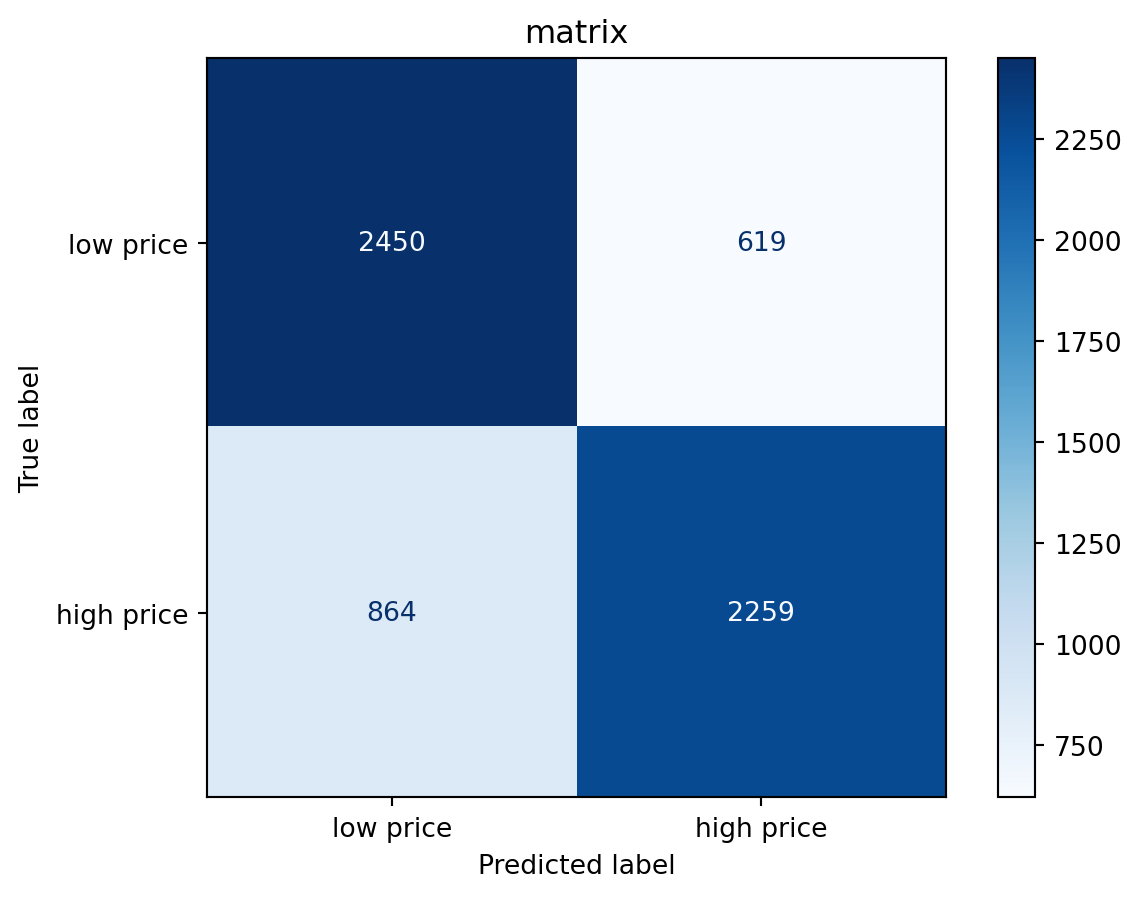

importance of features：
       features   weights
0      (MedInc)  2.338169
1    (AveRooms) -0.902615
2  (Population) -0.091441


In [5]:
# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy：{accuracy:.2f}（Proportion of correct predictions）")

# Draw confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low price', 'high price'])
disp.plot(cmap='Blues')
plt.title('matrix')
plt.show()

# See which features are important
feature_importance = pd.DataFrame({
    'features': ['(MedInc)', '(AveRooms)', '(Population)'],
    'weights': model.coef_[0]
})
print("importance of features：")
print(feature_importance)

## Step 5: Ideas for Improving Our Model’s Accuracy

### What Are We Doing Here?
Our model achieved an accuracy of 0.76, which means it got 76% of its predictions right—not bad for a start! We also saw the importance of features: `MedInc` (income) has a big positive weight (2.34), while `AveRooms` and `Population` have smaller or negative weights. But can we do better than 0.76? In this step, we’ll suggest some ideas for improving the model and let you try them out.

### Why This Step?
Building a model is just the beginning. Improving it is like tuning a guitar—you try different things to get the best sound. Here are some ideas to explore, and we’ll give you a starting point to experiment with!

### Suggestions for Improvement
Here are a few ways you can try to boost the model’s accuracy. Pick one (or more!) and see what happens:

1. **Add More Features**: We only used `MedInc`, `AveRooms`, and `Population`. What if we include other features like `HouseAge`, `Latitude`, or `Longitude`? Maybe they’ll help the model learn more patterns.
2. **Tune the Model’s Settings**: logistic regression has a setting called `C` (it controls how strict the model is). The default is 1.0, but you could try smaller (like 0.1) or larger (like 10) values to see if it improves accuracy.
3. **Adjust the Decision Threshold**: Right now, we predict “high price” if the probability is above 0.5 (default by LogisticRegression). What if we change it to 0.7 or 0.3? This might catch more high-priced areas (or fewer false positives).

### Try It Out!
Below is a basic code framework to get you started. Pick one idea, tweak the code, and see if the accuracy improves. Don’t be afraid to experiment!

In [6]:
# Start experimenting with improving the model
print("Try one of the suggestions to improve the model!")

# Example 1: Add more features (uncomment and modify)
# X = data[['MedInc', 'AveRooms', 'Population', 'HouseAge', 'Latitude', 'Longitude']]
# X_scaled = scaler.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy with more features: {accuracy:.2f}")

# Example 2: Tune the C parameter (uncomment and modify)
# C = 0.1
# model = LogisticRegression(C=C)  # Try different values like 0.1, 10, etc.
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy with new C={C}: {accuracy:.2f}")

# Example 3: Adjust the decision threshold (uncomment and modify)
# y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
# threshold = 0.7  # Try 0.7 or 0.3
# y_pred_custom = (y_prob > threshold).astype(int)
# accuracy_custom = accuracy_score(y_test, y_pred_custom)
# print(f"Accuracy with threshold {threshold}: {accuracy_custom:.2f}")

# Add more experiments as you like!
print("Pick an idea, tweak the code, and see if you can beat the original accuracy of 0.76!")

Try one of the suggestions to improve the model!
Pick an idea, tweak the code, and see if you can beat the original accuracy of 0.76!
